# Project Data Analysis Visualizations Jupyter notebook

Sandra Rajoo <a href="rajoo@usc.edu">rajoo@usc.edu</a>

This notebook will be analyzing amtrack data for the busiest station.

Data source: 
1. https://www.bts.dot.gov/browse-statistical-products-and-data/state-transportation-statistics/amtrak-ridership
2. https://www.kaggle.com/datasets/pranavbadami/nj-transit-amtrak-nec-performance

<b>Chart 1: A proportional symbol map showing Amtrak stations across the US </b>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#!pip install altair
import altair as alt

In [3]:
ridership = pd.read_csv('data/Ridership.csv')
ridership = ridership.rename(columns={'Value':'Ridership'})
ridership.drop("Fiscal Year", axis=1, inplace=True)
ridership.drop("Note", axis=1, inplace=True)
ridership

,Latitude,Longitude,State,Station,Ridership
0,40.749680,-73.991867,New York,"New York City (Penn Station), New York",4061379
1,38.897305,-77.006371,District of Columbia,"Washington Union Station, District of Columbia",1758409
2,39.954609,-75.183189,Pennsylvania,"Philadelphia William H. Gray III 30th Street, ...",1500043
3,41.878731,-87.639168,Illinois,"Chicago, Illinois",1336525
4,42.351524,-71.055298,Massachusetts,"Boston-South Station, Massachusetts",679333
...,...,...,...,...,...
497,41.721359,-86.905220,Indiana,"Michigan City, Indiana",338
498,37.724239,-80.644646,West Virginia,"Alderson, West Virginia",271
499,40.071730,-74.951431,Pennsylvania,"Cornwells Heights, Pennsylvania",234
500,30.140099,-102.399055,Texas,"Sanderson, Texas",153


In [4]:
from vega_datasets import data
states = alt.topo_feature(data.us_10m.url, feature='states')

In [5]:
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(ridership).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Ridership:Q'),
    color= alt.Color('Ridership:Q', scale=alt.
                      Scale(scheme = 'dark2')),
    tooltip=['Station:N']
).properties(
    title='Amtrak Stations across the US'
)

background + points

alt.LayerChart(...)

The proportional symbol map shows the distribution of Amtrak stations across the US. The size of the bubbles are characterized by the proportion of ridership in each station. From here we can analyze which stations are the busiest which gives useful information about how to best serve each station.

<b> Chart 2: A bar chart showing the 10 busiest stations </b>

In [6]:
ridership_df = pd.DataFrame(ridership)
ridership_df = ridership_df.sort_values('Ridership', ascending=False)
ridership_df = ridership_df.iloc[:10]
station_code = ["NYP", "WAS", "PHL", "CHI", "BOS", "LAX", "BAL", "ALB", "NHV", "BBY"]
ridership_df['Station_Code'] = station_code
ridership_df

,Latitude,Longitude,State,Station,Ridership,Station_Code
0,40.749680,-73.991867,New York,"New York City (Penn Station), New York",4061379,NYP
1,38.897305,-77.006371,District of Columbia,"Washington Union Station, District of Columbia",1758409,WAS
2,39.954609,-75.183189,Pennsylvania,"Philadelphia William H. Gray III 30th Street, ...",1500043,PHL
3,41.878731,-87.639168,Illinois,"Chicago, Illinois",1336525,CHI
4,42.351524,-71.055298,Massachusetts,"Boston-South Station, Massachusetts",679333,BOS
5,34.056297,-118.236534,California,"Los Angeles, California",466417,LAX
6,39.308121,-76.617477,Maryland,"Baltimore, Maryland",446914,BAL
7,42.641647,-73.741257,New York,"Albany-Rensselaer, New York",379209,ALB
8,41.298668,-72.925995,Connecticut,"New Haven, Connecticut",347544,NHV
9,42.347305,-71.076355,Massachusetts,"Boston-Back Bay, Massachusetts",322928,BBY


In [7]:
alt.Chart(ridership_df, width=500).mark_bar().encode(
  x=alt.X('Station_Code', axis = alt.Axis(labelAngle=0)),
  y='Ridership')

alt.Chart(...)

Here we have a bar chart that further explains the map shown earlier. Here we can the 10 busiest stations across the United States. We can further see that NYP has significantly higher ridership than other stations. This kind of data enables us to pin point the stations that require further analysis based on performance.

<b>Chart 3: Pie charts showing the percentage of cancellations into and from the busiest station NYP in 2019 </b>

In [8]:
df_jan = pd.read_csv('data/archive/2019_01.csv', index_col = False)
df_feb = pd.read_csv('data/archive/2019_02.csv', index_col = False)
df_march = pd.read_csv('data/archive/2019_03.csv', index_col = False)
df_april = pd.read_csv('data/archive/2019_04.csv', index_col = False)
df_may = pd.read_csv('data/archive/2019_05.csv', index_col = False)
df_june = pd.read_csv('data/archive/2019_06.csv', index_col = False)
df_july = pd.read_csv('data/archive/2019_07.csv', index_col = False)
df_august = pd.read_csv('data/archive/2019_08.csv', index_col = False)
df_sept = pd.read_csv('data/archive/2019_09.csv', index_col = False)
df_oct = pd.read_csv('data/archive/2019_10.csv', index_col = False)
df_nov = pd.read_csv('data/archive/2019_11.csv', index_col = False)
df_dec = pd.read_csv('data/archive/2019_12.csv', index_col = False)

df_jan_cancelled_to_nyp = df_jan[(df_jan['type'] == 'Amtrak') & (df_jan['status'] == 'cancelled') & (df_jan['to'] == 'New York Penn Station') ]
df_jan_cancelled_to_nyp = df_jan_cancelled_to_nyp['train_id'].count()

df_jan_cancelled_from_nyp = df_jan[(df_jan['type'] == 'Amtrak') & (df_jan['status'] == 'cancelled') & (df_jan['from'] == 'New York Penn Station') ]
df_jan_cancelled_from_nyp = df_jan_cancelled_from_nyp['train_id'].count()

df_feb_cancelled_to_nyp = df_feb[(df_feb['type'] == 'Amtrak') & (df_feb['status'] == 'cancelled') & (df_feb['to'] == 'New York Penn Station') ]
df_feb_cancelled_to_nyp = df_feb_cancelled_to_nyp['train_id'].count()

df_feb_cancelled_from_nyp = df_feb[(df_feb['type'] == 'Amtrak') & (df_feb['status'] == 'cancelled') & (df_feb['from'] == 'New York Penn Station') ]
df_feb_cancelled_from_nyp = df_feb_cancelled_from_nyp['train_id'].count()

df_march_cancelled_to_nyp = df_march[(df_march['type'] == 'Amtrak') & (df_march['status'] == 'cancelled') & (df_march['to'] == 'New York Penn Station') ]
df_march_cancelled_to_nyp = df_march_cancelled_to_nyp['train_id'].count()

df_march_cancelled_from_nyp = df_march[(df_march['type'] == 'Amtrak') & (df_march['status'] == 'cancelled') & (df_march['from'] == 'New York Penn Station') ]
df_march_cancelled_from_nyp = df_march_cancelled_from_nyp['train_id'].count()

df_april_cancelled_to_nyp = df_april[(df_april['type'] == 'Amtrak') & (df_april['status'] == 'cancelled') & (df_april['to'] == 'New York Penn Station') ]
df_april_cancelled_to_nyp = df_april_cancelled_to_nyp['train_id'].count()

df_april_cancelled_from_nyp = df_april[(df_march['type'] == 'Amtrak') & (df_march['status'] == 'cancelled') & (df_march['from'] == 'New York Penn Station') ]
df_april_cancelled_from_nyp = df_april_cancelled_from_nyp['train_id'].count()

df_may_cancelled_to_nyp = df_may[(df_may['type'] == 'Amtrak') & (df_may['status'] == 'cancelled') & (df_may['to'] == 'New York Penn Station') ]
df_may_cancelled_to_nyp = df_may_cancelled_to_nyp['train_id'].count()

df_may_cancelled_from_nyp = df_may[(df_may['type'] == 'Amtrak') & (df_may['status'] == 'cancelled') & (df_may['from'] == 'New York Penn Station') ]
df_may_cancelled_from_nyp = df_may_cancelled_from_nyp['train_id'].count()

df_june_cancelled_to_nyp = df_june[(df_june['type'] == 'Amtrak') & (df_june['status'] == 'cancelled') & (df_june['to'] == 'New York Penn Station') ]
df_june_cancelled_to_nyp = df_june_cancelled_to_nyp['train_id'].count()

df_june_cancelled_from_nyp = df_june[(df_march['type'] == 'Amtrak') & (df_march['status'] == 'cancelled') & (df_march['from'] == 'New York Penn Station') ]
df_june_cancelled_from_nyp = df_june_cancelled_from_nyp['train_id'].count()

df_july_cancelled_to_nyp = df_july[(df_july['type'] == 'Amtrak') & (df_july['status'] == 'cancelled') & (df_july['to'] == 'New York Penn Station') ]
df_july_cancelled_to_nyp = df_july_cancelled_to_nyp['train_id'].count()

df_july_cancelled_from_nyp = df_july[(df_july['type'] == 'Amtrak') & (df_july['status'] == 'cancelled') & (df_july['from'] == 'New York Penn Station') ]
df_july_cancelled_from_nyp = df_july_cancelled_from_nyp['train_id'].count()

df_august_cancelled_to_nyp = df_august[(df_august['type'] == 'Amtrak') & (df_august['status'] == 'cancelled') & (df_august['to'] == 'New York Penn Station') ]
df_august_cancelled_to_nyp = df_august_cancelled_to_nyp['train_id'].count()

df_august_cancelled_from_nyp = df_august[(df_august['type'] == 'Amtrak') & (df_august['status'] == 'cancelled') & (df_august['from'] == 'New York Penn Station') ]
df_august_cancelled_from_nyp = df_august_cancelled_from_nyp['train_id'].count()

df_sept_cancelled_to_nyp = df_sept[(df_sept['type'] == 'Amtrak') & (df_sept['status'] == 'cancelled') & (df_sept['to'] == 'New York Penn Station') ]
df_sept_cancelled_to_nyp = df_sept_cancelled_to_nyp['train_id'].count()

df_sept_cancelled_from_nyp = df_sept[(df_sept['type'] == 'Amtrak') & (df_sept['status'] == 'cancelled') & (df_sept['from'] == 'New York Penn Station') ]
df_sept_cancelled_from_nyp = df_sept_cancelled_from_nyp['train_id'].count()

df_oct_cancelled_to_nyp = df_oct[(df_oct['type'] == 'Amtrak') & (df_oct['status'] == 'cancelled') & (df_oct['to'] == 'New York Penn Station') ]
df_oct_cancelled_to_nyp = df_oct_cancelled_to_nyp['train_id'].count()

df_oct_cancelled_from_nyp = df_oct[(df_oct['type'] == 'Amtrak') & (df_oct['status'] == 'cancelled') & (df_oct['from'] == 'New York Penn Station') ]
df_oct_cancelled_from_nyp = df_oct_cancelled_from_nyp['train_id'].count()

df_nov_cancelled_to_nyp = df_nov[(df_nov['type'] == 'Amtrak') & (df_nov['status'] == 'cancelled') & (df_nov['to'] == 'New York Penn Station') ]
df_nov_cancelled_to_nyp = df_nov_cancelled_to_nyp['train_id'].count()

df_nov_cancelled_from_nyp = df_nov[(df_nov['type'] == 'Amtrak') & (df_nov['status'] == 'cancelled') & (df_nov['from'] == 'New York Penn Station') ]
df_nov_cancelled_from_nyp = df_nov_cancelled_from_nyp['train_id'].count()

df_dec_cancelled_to_nyp = df_dec[(df_dec['type'] == 'Amtrak') & (df_dec['status'] == 'cancelled') & (df_dec['to'] == 'New York Penn Station') ]
df_dec_cancelled_to_nyp = df_dec_cancelled_to_nyp['train_id'].count()

df_dec_cancelled_from_nyp = df_dec[(df_dec['type'] == 'Amtrak') & (df_dec['status'] == 'cancelled') & (df_dec['from'] == 'New York Penn Station') ]
df_dec_cancelled_from_nyp = df_dec_cancelled_from_nyp['train_id'].count()


<ipython-input-8-da56fab122c3>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_april_cancelled_from_nyp = df_april[(df_march['type'] == 'Amtrak') & (df_march['status'] == 'cancelled') & (df_march['from'] == 'New York Penn Station') ]
<ipython-input-8-da56fab122c3>:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_june_cancelled_from_nyp = df_june[(df_march['type'] == 'Amtrak') & (df_march['status'] == 'cancelled') & (df_march['from'] == 'New York Penn Station') ]


In [9]:
import matplotlib.cm as cm

In [10]:
def pie_chart(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = lambda x: str(round(x, 1)) + '%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what to label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'


        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

       
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title)
    plt.show()

In [11]:
status_data_to_nyp = [df_jan_cancelled_to_nyp,df_feb_cancelled_to_nyp, df_march_cancelled_to_nyp, df_april_cancelled_to_nyp, df_may_cancelled_to_nyp, df_june_cancelled_to_nyp, df_july_cancelled_to_nyp, df_august_cancelled_to_nyp, df_sept_cancelled_to_nyp, df_oct_cancelled_to_nyp, df_nov_cancelled_to_nyp, df_dec_cancelled_to_nyp]
status_data_from_nyp = [df_jan_cancelled_from_nyp,df_feb_cancelled_from_nyp, df_march_cancelled_from_nyp, df_april_cancelled_from_nyp, df_may_cancelled_from_nyp, df_june_cancelled_from_nyp, df_july_cancelled_from_nyp, df_august_cancelled_from_nyp, df_sept_cancelled_from_nyp, df_oct_cancelled_from_nyp, df_nov_cancelled_from_nyp, df_dec_cancelled_from_nyp]

In [12]:
labels = 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec'

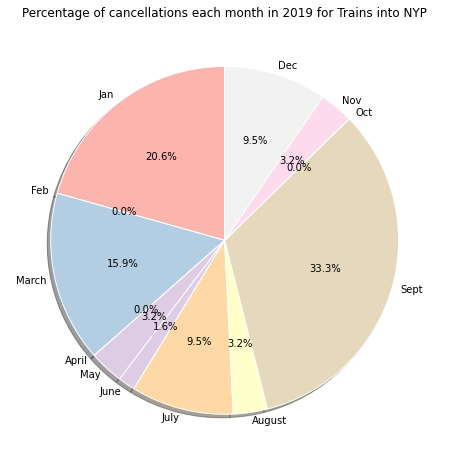

In [13]:
pie_chart(fractions = status_data_to_nyp,
         labels = labels,
         title= 'Percentage of cancellations each month in 2019 for Trains into NYP')

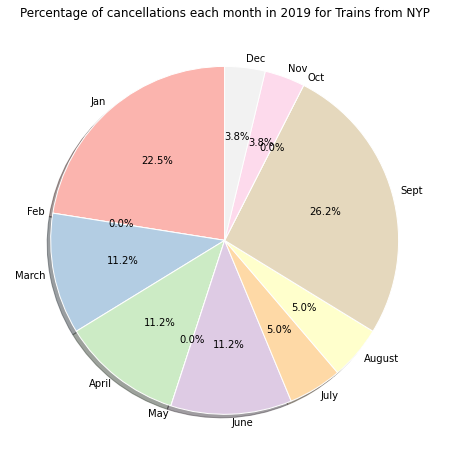

In [14]:
pie_chart(fractions = status_data_from_nyp,
         labels = labels,
         title= 'Percentage of cancellations each month in 2019 for Trains from NYP')

Here we have 2 pie charts depicting the number of cancellations of trains in each month to and from the busiest station. This data is useful to identify what times in a year we would experience more cancellations. It would seem that the beginning of every season seems to result in higher cancellations. Further analysis can now be done to see if there's a relation between time of the year and cancellations

In [15]:
delayDF = pd.read_csv('data/delay_by_time.csv')
delayDF

,time,delay_minutes
0,00:00:00,5.767670
1,00:01:00,5.530367
2,00:02:00,3.108660
3,00:03:00,2.735152
4,00:04:00,3.137413
...,...,...
1359,23:55:00,2.876940
1360,23:56:00,2.943954
1361,23:57:00,3.797804
1362,23:58:00,1.203632


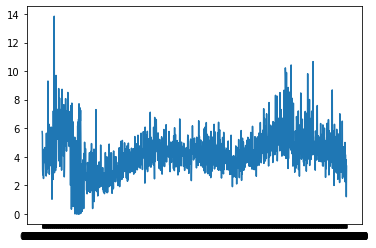

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(delayDF.time, delayDF.delay_minutes)